# Experiment Monitor Demo

This notebook demonstrates the T37 experiment monitor. Provide an experiment ID, then view the metrics table and plots (rendered inline in Jupyter).

In [2]:
# Parameters (edit only this cell)
EXPERIMENT_ID = "72e2f33398274260bcbeb44478839499573357d2f92b332e0e05a9df4c4d3576"
OUTPUT_DIR = None  # Optional: Path('...') to save plots even in notebook
STRICT = False


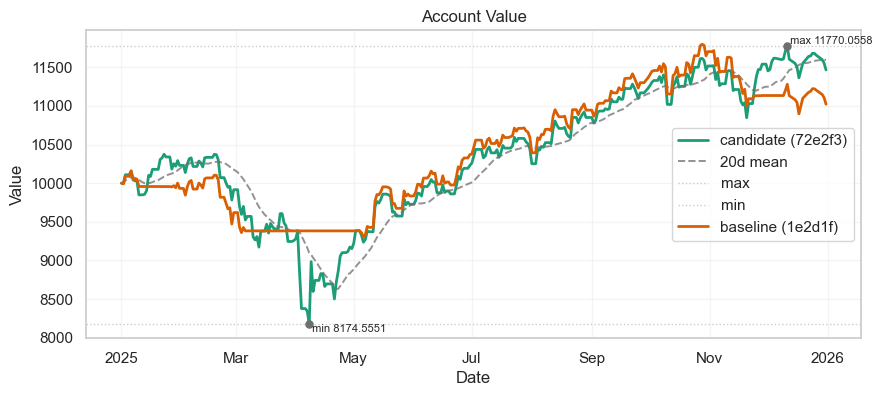

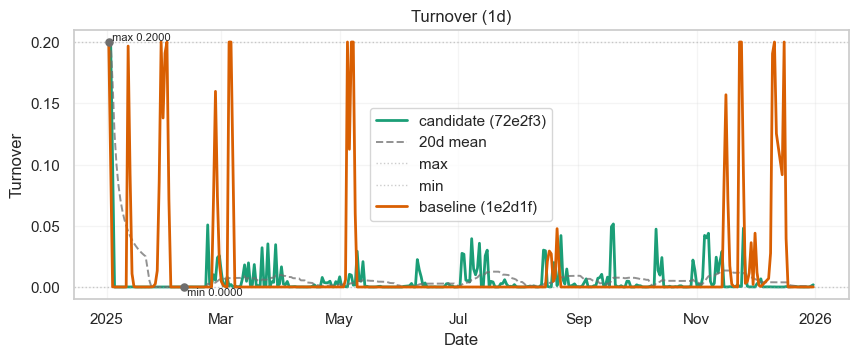

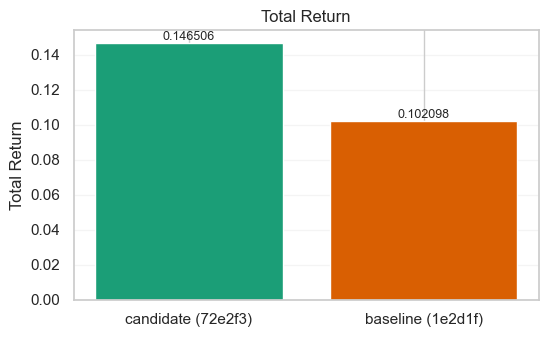

Experiment Summary
+-------------+--------------------------------------------------------------------------+
| field       | value                                                                    |
+-------------+--------------------------------------------------------------------------+
| feature_set | core_v1                                                                  |
| policy      | ppo_ppo_72e2f33398274260bcbeb44478839499573357d2f92b332e0e05a9df4c4d3576 |
| start_date  | 2025-01-01                                                               |
| end_date    | 2025-12-31                                                               |
| test_window | 2025-01-01 → 2025-12-31                                                  |
+-------------+--------------------------------------------------------------------------+

Metrics
+----------------+----------+
| metric         | value    |
+----------------+----------+
| cagr           | 0.101617 |
| calmar         | 0.479273 |
| m

In [3]:
from pathlib import Path
import sys

repo_root = Path.cwd()
if not (repo_root / 'research').exists():
    repo_root = repo_root.parent
if (repo_root / 'research').exists():
    sys.path.insert(0, str(repo_root))

try:
    get_ipython().run_line_magic('matplotlib', 'inline')
except Exception:
    pass

from research.monitoring.experiment_report import generate_experiment_report, format_table

report = generate_experiment_report(
    EXPERIMENT_ID,
    output_dir=OUTPUT_DIR,
    strict=STRICT,
    inline=True,
)

print('Experiment Summary')
meta_rows = [{'field': k, 'value': v} for k, v in (report.get('metadata') or {}).items()]
if meta_rows:
    print(format_table(meta_rows))
else:
    print('No metadata available.')

print('\nMetrics')
print(format_table(report.get('metrics_table')))

comparison_table = report.get('comparison_table')
if comparison_table is not None and not comparison_table.empty:
    print('\nBaseline Comparison')
    print(format_table(comparison_table))

winner_table = report.get('winner_table')
if winner_table is not None and not winner_table.empty:
    print('\n' + format_table(winner_table))

if report.get('figures'):
    print('\nSaved plots:')
    for label, path in report['figures'].items():
        print(f'- {label}: {path}')
